___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# VAR(p)
## Vector Autoregression
In our previous SARIMAX example, the forecast variable $y_t$ was influenced by the exogenous predictor variable, but not vice versa. That is, the occurrence of a holiday affected restaurant patronage but not the other way around.

However, there are some cases where variables affect each other. <a href='https://otexts.com/fpp2/VAR.html'>Forecasting: Principles and Practice</a> describes a case where changes in personal consumption expenditures $C_t$ were forecast based on changes in personal disposable income $I_t$.
> However, in this case a bi-directional relationship may be more suitable: an increase in $I_t$ will lead to an increase in $C_t$ and vice versa.<br>An example of such a situation occurred in Australia during the Global Financial Crisis of 2008–2009. The Australian government issued stimulus packages that included cash payments in December 2008, just in time for Christmas spending. As a result, retailers reported strong sales and the economy was stimulated. Consequently, incomes increased.

Aside from investigating multivariate time series, vector autoregression is used for
* <a href='https://www.statsmodels.org/devel/vector_ar.html#impulse-response-analysis'>Impulse Response Analysis</a> which involves the response of one variable to a sudden but temporary change in another variable
* <a href='https://www.statsmodels.org/devel/vector_ar.html#forecast-error-variance-decomposition-fevd'>Forecast Error Variance Decomposition (FEVD)</a> where the proportion of the forecast variance of one variable is attributed to the effect of other variables
* <a href='https://www.statsmodels.org/devel/vector_ar.html#dynamic-vector-autoregressions'>Dynamic Vector Autoregressions</a> used for estimating a moving-window regression for the purposes of making forecasts throughout the data sample

### Formulation
We've seen that an autoregression AR(p) model is described by the following:

&nbsp;&nbsp;&nbsp;&nbsp; $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

A $K$-dimensional VAR model of order $p$, denoted <strong>VAR(p)</strong>, considers each variable $y_K$ in the system.<br>

For example, The system of equations for a 2-dimensional VAR(1) model is:

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \varepsilon_{2,t}$

where the coefficient $\phi_{ii,l}$ captures the influence of the $l$th lag of variable $y_i$ on itself,<br>
the coefficient $\phi_{ij,l}$ captures the influence of the $l$th lag of variable $y_j$ on $y_i$,<br>
and $\varepsilon_{1,t}$ and $\varepsilon_{2,t}$ are white noise processes that may be correlated.<br>

Carrying this further, the system of equations for a 2-dimensional VAR(3) model is:

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \phi_{11,2}y_{1,t-2} + \phi_{12,2}y_{2,t-2} + \phi_{11,3}y_{1,t-3} + \phi_{12,3}y_{2,t-3} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \phi_{21,2}y_{1,t-2} + \phi_{22,2}y_{2,t-2} + \phi_{21,3}y_{1,t-3} + \phi_{22,3}y_{2,t-3} + \varepsilon_{2,t}$<br><br>

and the system of equations for a 3-dimensional VAR(2) model is:

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \phi_{13,1}y_{3,t-1} + \phi_{11,2}y_{1,t-2} + \phi_{12,2}y_{2,t-2} + \phi_{13,2}y_{3,t-2} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \phi_{23,1}y_{3,t-1} + \phi_{21,2}y_{1,t-2} + \phi_{22,2}y_{2,t-2} + \phi_{23,2}y_{3,t-2} + \varepsilon_{2,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{3,t} = c_3 + \phi_{31,1}y_{1,t-1} + \phi_{32,1}y_{2,t-1} + \phi_{33,1}y_{3,t-1} + \phi_{31,2}y_{1,t-2} + \phi_{32,2}y_{2,t-2} + \phi_{33,2}y_{3,t-2} + \varepsilon_{3,t}$<br><br>

The general steps involved in building a VAR model are:
* Examine the data
* Visualize the data
* Test for stationarity
* If necessary, transform the data to make it stationary
* Select the appropriate order <em>p</em>
* Instantiate the model and fit it to a training set
* If necessary, invert the earlier transformation
* Evaluate model predictions against a known test set
* Forecast the future

Recall that to fit a SARIMAX model we passed one field of data as our <em>endog</em> variable, and another for <em>exog</em>. With VAR, both fields will be passed in as <em>endog</em>.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.var_model.VAR.html'>vector_ar.var_model.VAR</a></strong><font color=black>(endog[, exog, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Fit VAR(p) process and do lag order selection<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.var_model.VARResults.html'>vector_ar.var_model.VARResults</a></strong><font color=black>(endog, …[, …])</font>&nbsp;&nbsp;Estimate VAR(p) process with fixed number of lags<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.dynamic.DynamicVAR.html'>vector_ar.dynamic.DynamicVAR</a></strong><font color=black>(data[, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Estimates time-varying vector autoregression (VAR(p)) using equation-by-equation least squares</tt>
   
<h3>For Further Reading:</h3>
<strong>
<a href='https://www.statsmodels.org/stable/vector_ar.html'>Statsmodels Tutorial:</a></strong>&nbsp;&nbsp;<font color=black>Vector Autoregressions</font><br>
<strong>
<a href='https://otexts.com/fpp2/VAR.html'>Forecasting: Principles and Practice:</a></strong>&nbsp;&nbsp;<font color=black>Vector Autoregressions</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Vector_autoregression'>Wikipedia:</a></strong>&nbsp;&nbsp;<font color=black>Vector Autoregression</font>
</div>

### Perform standard imports and load dataset
For this analysis we'll also compare money to spending. We'll look at the M2 Money Stock which is a measure of U.S. personal assets, and U.S. personal spending. Both datasets are in billions of dollars, monthly, seasonally adjusted. They span the 21 years from January 1995 to December 2015 (252 records).<br>
Sources: https://fred.stlouisfed.org/series/M2SL https://fred.stlouisfed.org/series/PCE

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('Tatacoffee13_21.csv',index_col=0, parse_dates=True)


sp = pd.read_csv('varforecasted_28.csv',index_col=0, parse_dates=True)


### Inspect the data

In [2]:
df = df
df.head()

,Open,High,Low,Close
Date,,,,
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-07,1580.00,1639.50,1565.50,1595.65


In [3]:
df = df.dropna()
df.shape

(2225, 4)

### Plot the source data

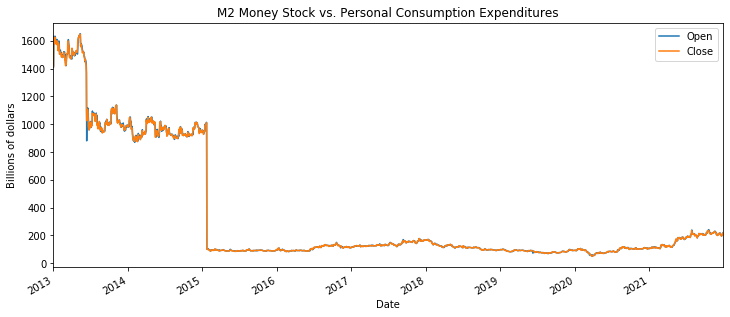

In [5]:
title = 'M2 Money Stock vs. Personal Consumption Expenditures'
ylabel='Billions of dollars'
xlabel=''

ax = df['Open'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df['Close'].plot(legend=True);

## Test for stationarity, perform any necessary transformations

In [6]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [7]:
adf_test(df['High'],title='High')

Augmented Dickey-Fuller Test: High
ADF test statistic        -2.462481
p-value                    0.124872
# lags used                0.000000
# observations          2224.000000
critical value (1%)       -3.433294
critical value (5%)       -2.862840
critical value (10%)      -2.567462
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [8]:
adf_test(df['Close'], title='Close')

Augmented Dickey-Fuller Test: Close
ADF test statistic        -3.007236
p-value                    0.034224
# lags used                1.000000
# observations          2223.000000
critical value (1%)       -3.433295
critical value (5%)       -2.862841
critical value (10%)      -2.567463
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Neither variable is stationary, so we'll take a first order difference of the entire DataFrame and re-run the augmented Dickey-Fuller tests. It's advisable to save transformed values in a new DataFrame, as we'll need the original when we later invert the transormations and evaluate the model.

In [9]:
df_transformed = df.diff()

In [10]:
df_transformed = df_transformed.dropna()
adf_test(df_transformed['High'], title='MoneyFirstDiff')
print()
adf_test(df_transformed['Close'], title='SpendingFirstDiff')

Augmented Dickey-Fuller Test: MoneyFirstDiff
ADF test statistic       -47.493742
p-value                    0.000000
# lags used                0.000000
# observations          2223.000000
critical value (1%)       -3.433295
critical value (5%)       -2.862841
critical value (10%)      -2.567463
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: SpendingFirstDiff
ADF test statistic       -45.818859
p-value                    0.000000
# lags used                0.000000
# observations          2223.000000
critical value (1%)       -3.433295
critical value (5%)       -2.862841
critical value (10%)      -2.567463
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Since Money is not yet stationary, we'll apply second order differencing to both series so they retain the same number of observations

In [11]:
df_transformed = df_transformed.diff().dropna()
adf_test(df_transformed['High'], title='MoneySecondDiff')
print()
adf_test(df_transformed['Close'], title='SpendingSecondDiff')

Augmented Dickey-Fuller Test: MoneySecondDiff
ADF test statistic     -1.528972e+01
p-value                 4.460377e-28
# lags used             2.700000e+01
# observations          2.195000e+03
critical value (1%)    -3.433333e+00
critical value (5%)    -2.862858e+00
critical value (10%)   -2.567471e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: SpendingSecondDiff
ADF test statistic     -1.519609e+01
p-value                 5.917871e-28
# lags used             2.700000e+01
# observations          2.195000e+03
critical value (1%)    -3.433333e+00
critical value (5%)    -2.862858e+00
critical value (10%)   -2.567471e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [12]:
df_transformed.head()

,Open,High,Low,Close
Date,,,,
2013-01-03,201.15,-151.40,189.05,-173.50
2013-01-04,-216.35,-93.45,-235.35,-65.95
2013-01-07,-42.95,57.90,29.35,63.75
2013-01-08,67.75,4.75,36.40,12.95
2013-01-09,13.10,-36.80,-24.55,-51.80


In [13]:
len(df_transformed)

2223

### Train/test split
It will be useful to define a number of observations variable for our test set. For this analysis, let's use 12 months.

In [14]:
nobs=12
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [15]:
print(train.shape)
print(test.shape)

(2211, 4)
(12, 4)


## VAR Model Order Selection
We'll fit a series of models using the first seven p-values, and base our final selection on the model that provides the lowest AIC and BIC scores.

In [16]:
for i in [1,2,3,4,5,6,7]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  20.9877767089024
BIC:  21.039367186680785

Order = 2
AIC:  19.96735122231903
BIC:  20.060248744873636

Order = 3
AIC:  19.431014226520713
BIC:  19.565249645535495

Order = 4
AIC:  19.088152734764172
BIC:  19.263756939397368

Order = 5
AIC:  18.737559143047335
BIC:  18.954563059993994

Order = 6
AIC:  18.44705720588397
BIC:  18.705491799438658

Order = 7
AIC:  18.306654877365702
BIC:  18.606551149485323



In [17]:
model = VAR(train)
for i in [1,2,3,4,5,6,7]:
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  20.9877767089024
BIC:  21.039367186680785

Order = 2
AIC:  19.96735122231903
BIC:  20.060248744873636

Order = 3
AIC:  19.431014226520713
BIC:  19.565249645535495

Order = 4
AIC:  19.088152734764172
BIC:  19.263756939397368

Order = 5
AIC:  18.737559143047335
BIC:  18.954563059993994

Order = 6
AIC:  18.44705720588397
BIC:  18.705491799438658

Order = 7
AIC:  18.306654877365702
BIC:  18.606551149485323



The VAR(5) model seems to return the lowest combined scores.<br>
Just to verify that both variables are included in the model we can run <tt>.endog_names</tt>

In [18]:
model.endog_names

['Open', 'High', 'Low', 'Close']

## Fit the VAR(5) Model

In [19]:
results = model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 12, Apr, 2022
Time:                     14:24:07
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    18.9546
Nobs:                     2206.00    HQIC:                   18.8168
Log likelihood:          -33104.2    FPE:                1.37284e+08
AIC:                      18.7376    Det(Omega_mle):     1.32178e+08
--------------------------------------------------------------------
Results for equation Open
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           -0.036833         0.481875           -0.076           0.939
L1.Open         -1.312833         0.066743          -19.670           0.000
L1.High         -0.679604         0.076630           -8.869           0.000
L1.Lo

## Predict the next 12 values
Unlike the VARMAX model we'll use in upcoming sections, the VAR <tt>.forecast()</tt> function requires that we pass in a lag order number of previous observations as well. Unfortunately this forecast tool doesn't provide a DateTime index - we'll have to do that manually.

In [20]:
lag_order = results.k_ar
lag_order

5

In [21]:
z = results.forecast(y=train.values[-lag_order:], steps=12)
z

array([[ 3.47114325, -2.65613096,  0.75263997, -2.46849187],
       [-2.85974557,  0.25070745,  0.05703135,  1.76799221],
       [ 2.90907967,  1.33313823,  1.43761089,  0.28056018],
       [-0.85625082, -1.1130784 ,  0.07486385, -1.4678076 ],
       [-1.57157966, -0.1579786 , -2.41839957,  0.24697093],
       [ 1.2715297 ,  0.63119214,  0.7897666 ,  0.24408246],
       [-0.73330354, -0.81369887,  0.76978606,  0.03707164],
       [ 0.68782402,  0.85999621, -0.2192522 ,  0.25025081],
       [ 0.16319644, -0.22680125,  0.37308683, -0.19502234],
       [-0.67554684, -0.25013885, -0.82499037, -0.32116596],
       [-0.01104164, -0.02229836, -0.04095429,  0.22610667],
       [ 0.35874233,  0.22733801,  0.63763584,  0.16216582]])

In [47]:
test

,Open,High,Low,Close
Date,,,,
2021-12-13,5.75,-5.25,0.15,-5.45
2021-12-14,-8.80,-2.55,-2.45,0.10
2021-12-15,2.75,2.75,-0.20,-0.15
2021-12-16,-0.10,-0.10,-1.35,-1.45
2021-12-17,-4.10,-4.10,-0.95,-0.25
2021-12-20,-3.00,-3.00,-8.80,-6.15
2021-12-21,4.00,12.05,18.45,14.80
2021-12-22,10.90,-0.30,-0.35,0.25
2021-12-23,-3.80,-4.70,-4.65,-7.40


## Invert the Transformation
Remember that the forecasted values represent second-order differences. To compare them to the original data we have to roll back each difference. To roll back a first-order difference we take the most recent value on the training side of the original series, and add it to a cumulative sum of forecasted values. When working with second-order differences we first must perform this operation on the most recent first-order difference.

Here we'll use the <tt>nobs</tt> variable we defined during the train/test/split step.

## Plot the results
The VARResults object offers a couple of quick plotting tools:

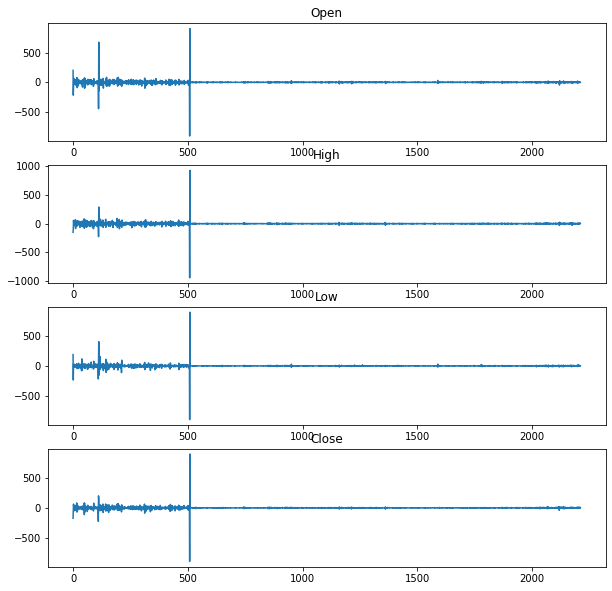

In [26]:
results.plot();

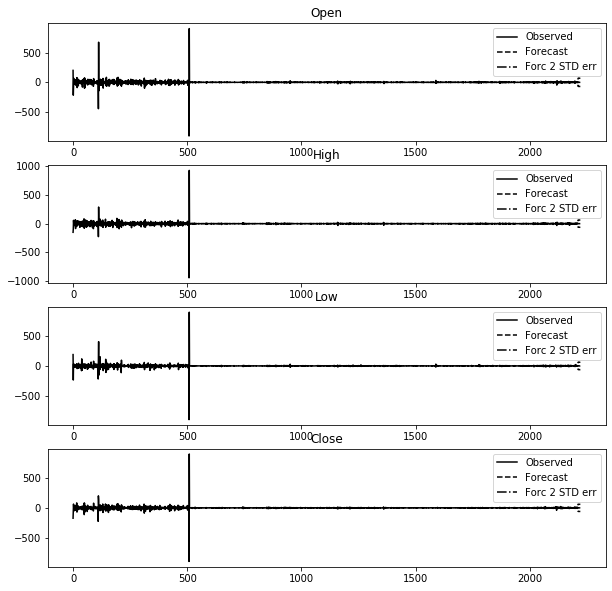

In [36]:
results.plot_forecast(12);

But for our investigation we want to plot predicted values against our test set.

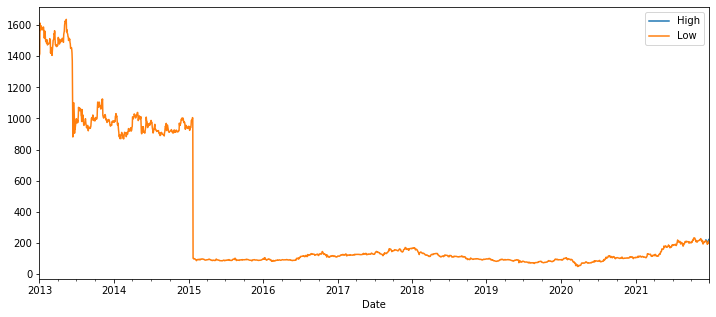

In [29]:
df['High'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df['Low'].plot(legend=True);

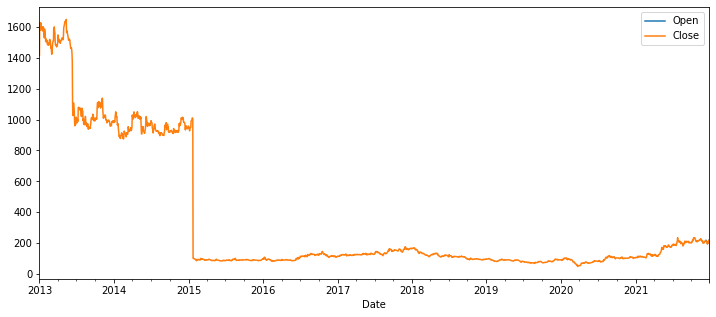

In [31]:
df['Open'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df['Close'].plot(legend=True);

<strong>CONCLUSION:</strong> It looks like the VAR(5) model did <em>not</em> do better than the individual AR(5) models. That's ok - we know more than we did before. In the next section we'll look at VARMA and see if the addition of a $q$ parameter helps. Great work!